# **Prediction on Result of IPL Using Machine Learning**

In [ ]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import lightgbm as lgb

#**Importing IPL dataset**

In [ ]:
# Loading the dataset
data = pd.read_csv('IPL Matches.csv')

# Displaying the first 5 rows of the dataset
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
# Displaying the last 5 rows of the dataset
data.tail(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


# **Understanding our data**

In [ ]:
# Shape of our data
print("Rows and Columns of the dataset :- ",data.shape)

Rows and Columns of the dataset :-  (816, 17)


In [ ]:
# Identifying information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:
# Displaying the columns in our dataset
data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
# Replacing 'Rising Pune Supergiants' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)

# Replacing 'Deccan Chargers' with 'Sunrisers Hyderabad' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.team2.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.toss_winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)

# Replacing 'Delhi Daredevils' with 'Delhi Capitals' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.team2.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.toss_winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)

# Replacing 'Pune Warriors' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)

In [ ]:
# To show statistical summary of the columns of our data
data.describe(include ='all')

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
count,8.160000e+02,803,816,812,816,816.000000,816,816,816,816,812,812,799.000000,812,19,816,816
unique,NaN,32,596,233,36,NaN,11,11,11,2,11,3,NaN,2,1,48,47
top,NaN,Mumbai,2014-05-11,AB de Villiers,Eden Gardens,NaN,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,NaN,N,D/L,HDPK Dharmasena,S Ravi
freq,NaN,101,2,23,77,NaN,108,106,106,496,120,435,NaN,799,19,78,84
mean,7.563496e+05,NaN,NaN,NaN,NaN,0.094363,NaN,NaN,NaN,NaN,NaN,NaN,17.321652,NaN,NaN,NaN,NaN
std,3.058943e+05,NaN,NaN,NaN,NaN,0.292512,NaN,NaN,NaN,NaN,NaN,NaN,22.068427,NaN,NaN,NaN,NaN
min,3.359820e+05,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,5.012278e+05,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN
50%,7.292980e+05,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN
75%,1.082626e+06,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.500000,NaN,NaN,NaN,NaN


# **Checking NULL Values**

In [ ]:
# To count the null values
data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [ ]:
# Fill missing values in 'city' column with 'Unknown'
data['city'].fillna('Unknown', inplace=True)

In [ ]:
# Fill missing values in 'player_of_match', 'result', and 'eliminator' columns with 'Not Available'
cols_to_fill = ['player_of_match', 'result', 'eliminator']
data[cols_to_fill] = data[cols_to_fill].fillna('Not Available')

In [ ]:
# Calculate the mean of the 'result_margin' column
mean_result_margin = data['result_margin'].mean()

# Fill missing values in 'result_margin' column with the mean
data['result_margin'].fillna(mean_result_margin, inplace=True)

In [ ]:
# To drop the unwanted columns
data.drop(['id','method'],axis=1,inplace=True)

In [ ]:
# Drop rows with missing values in the 'winner' column
data.dropna(subset=['winner'], inplace=True)


In [ ]:
# To count the null values
data.isnull().sum()

city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
# Checking the shape of our data after handling null values
data.shape

(812, 15)

In [ ]:
# displaying our data
data.head()

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


# **EDA - Exploratory Data Analysis**

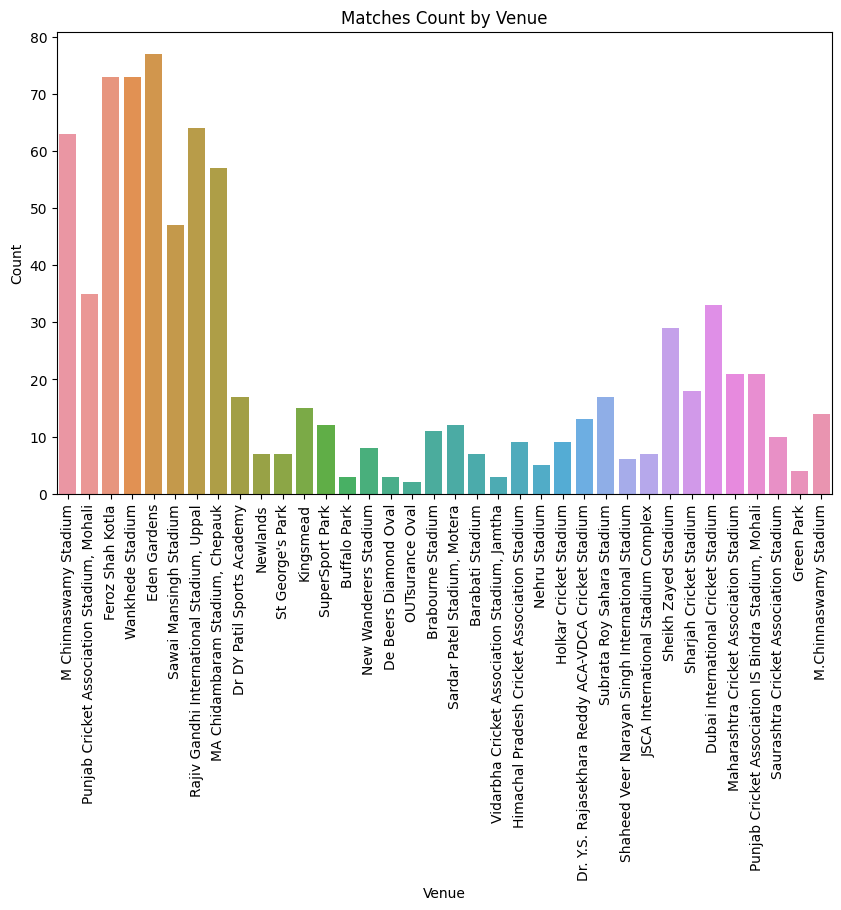

In [ ]:
# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# The 'x' parameter is set to 'venue', and 'data' specifies the DataFrame to use for plotting
sns.countplot(x='venue', data=data)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Matches Count by Venue')

# Display the plot
plt.show()

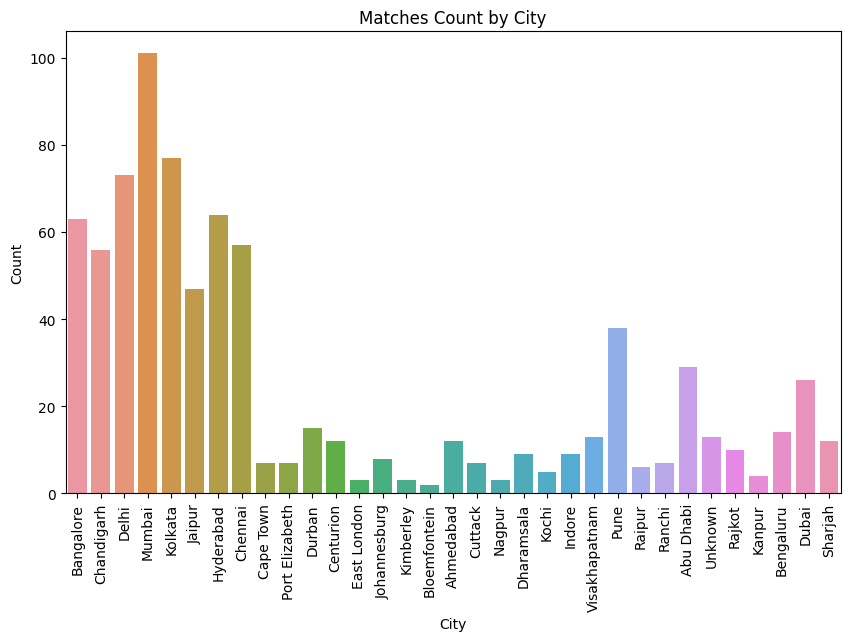

In [ ]:
# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# The 'x' parameter is set to 'city', and 'data' specifies the DataFrame to use for plotting
sns.countplot(x='city', data=data)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('City')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Matches Count by City')

# Display the plot
plt.show()

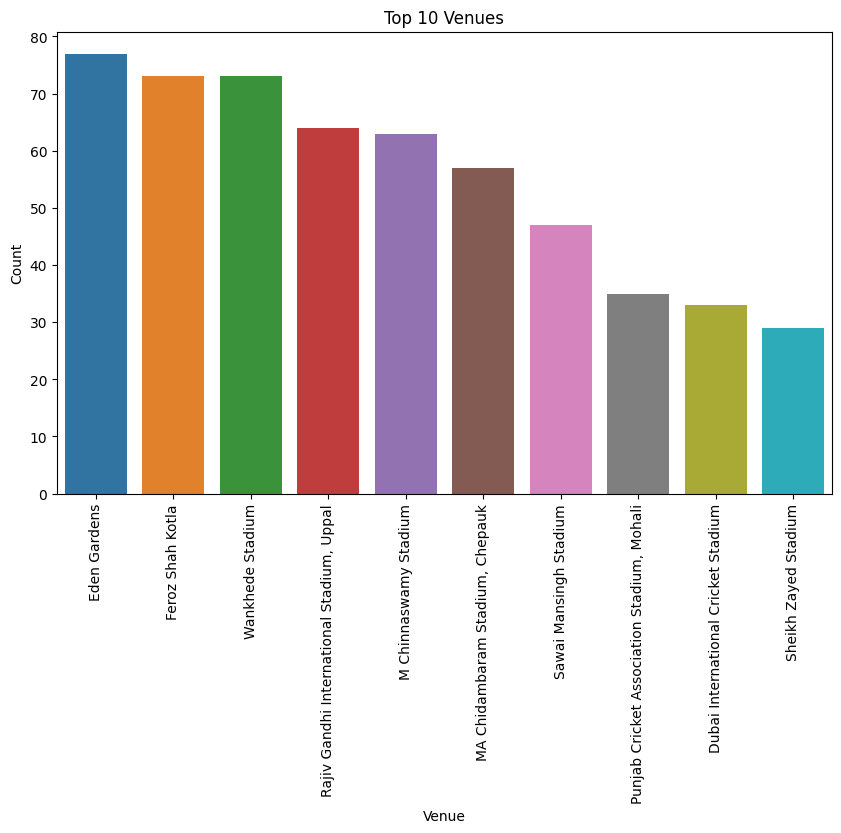

In [ ]:
# Get the top 10 venues with the highest number of matches played
venue_counts = data['venue'].value_counts().head(10)

# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Use Seaborn's barplot to plot the count of matches for each of the top 10 venues
# The 'x' parameter is set to the venue names (index of venue_counts), and 'y' is set to the corresponding match counts (values of venue_counts)
sns.barplot(x=venue_counts.index, y=venue_counts.values)

# Add labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Top 10 Venues')

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

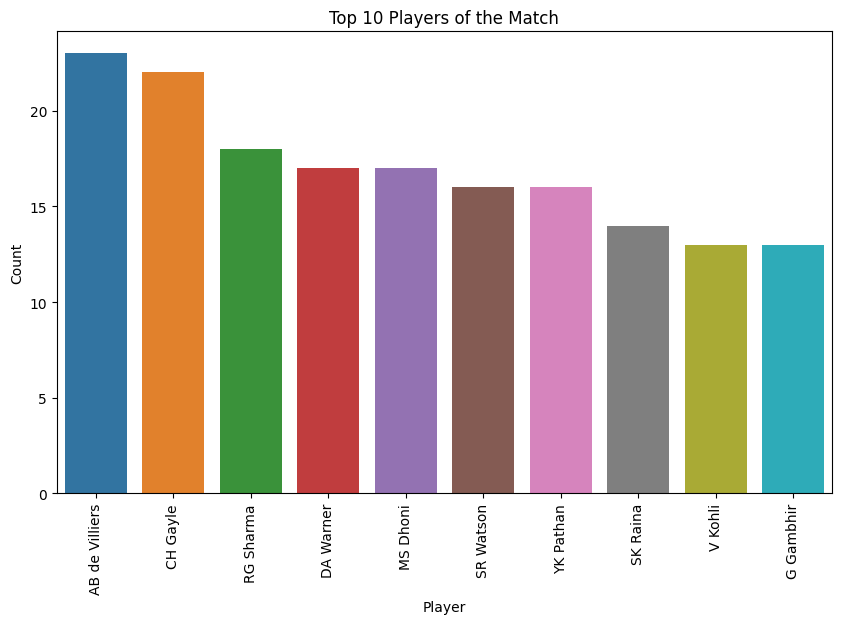

In [ ]:
# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Get the top 10 players with the highest number of "Player of the Match" awards
top_players = data['player_of_match'].value_counts().head(10)

# Use Seaborn's barplot to plot the count of "Player of the Match" awards for each of the top 10 players
# The 'x' parameter is set to the player names (index of top_players), and 'y' is set to the corresponding award counts (values of top_players)
sns.barplot(x=top_players.index, y=top_players.values)

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Add labels for x and y axes
plt.xlabel('Player')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Top 10 Players of the Match')

# Display the plot
plt.show()


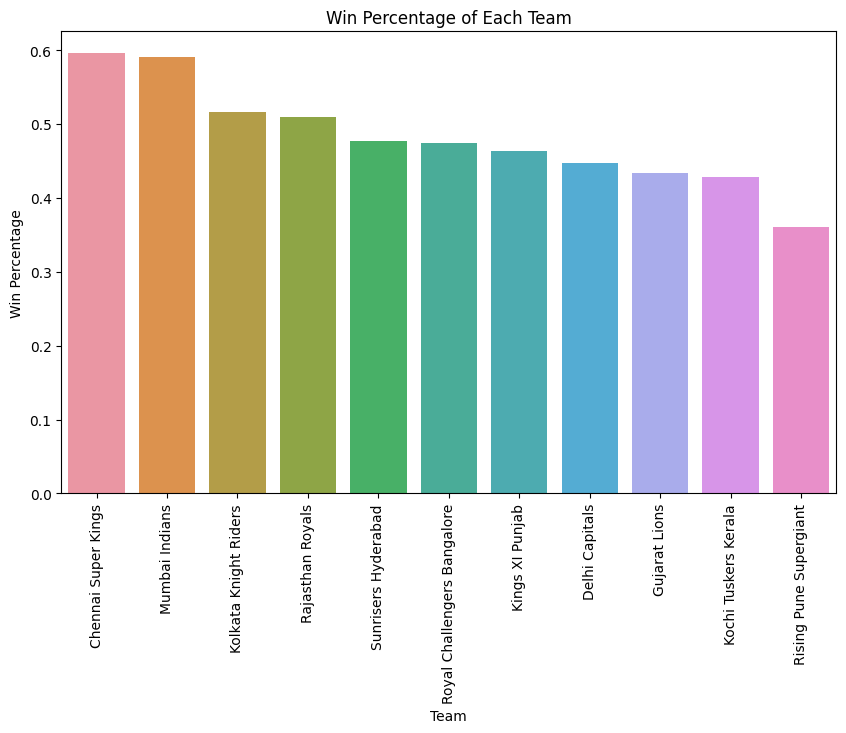

In [ ]:
# Calculate win percentage for each team
team_wins = data['winner'].value_counts()
team_matches = data['team1'].value_counts() + data['team2'].value_counts()
win_percentage = (team_wins / team_matches).sort_values(ascending=False)

# Plot win percentage for each team
plt.figure(figsize=(10, 6))
sns.barplot(x=win_percentage.index, y=win_percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Each Team')
plt.show()


# **Data Preparation**

### **Mapping Categorical data into numerical form**
The purpose of this conversion is to transform the categorical data (team names) into numerical form, which is required for many machine learning algorithms that can only handle numerical data. By mapping team names to unique numbers, we can represent them as numerical features in the dataset, enabling us to use them in the model training process.

In [ ]:
# Create a dictionary to map team names to unique numbers
team_mapping = {
    'Kolkata Knight Riders': 1,
    'Chennai Super Kings': 2,
    'Delhi Capitals': 3,
    'Royal Challengers Bangalore': 4,
    'Rajasthan Royals': 5,
    'Kings XI Punjab': 6,
    'Sunrisers Hyderabad': 7,
    'Mumbai Indians': 8,
    'Rising Pune Supergiant': 9,
    'Kochi Tuskers Kerala': 10,
    'Gujarat Lions': 11
}

# Replace team names in 'team1' and 'team2' columns with unique numbers
data['team1'] = data['team1'].map(team_mapping)
data['team2'] = data['team2'].map(team_mapping)

# Replace winner names in 'winner' column with unique numbers
data['winner'] = data['winner'].map(team_mapping)
data['toss_winner'] = data['toss_winner'].map(team_mapping)


In [ ]:
data.head(5)

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,4,1,4,field,1,runs,140.0,N,Asad Rauf,RE Koertzen
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,6,2,2,bat,2,runs,33.0,N,MR Benson,SL Shastri
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,3,5,5,bat,3,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,8,4,8,bat,4,wickets,5.0,N,SJ Davis,DJ Harper
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,1,7,7,bat,1,wickets,5.0,N,BF Bowden,K Hariharan


In [ ]:
# Create a dictionary to map each unique venue name to a unique number
venue_mapping = {venue: i for i, venue in enumerate(data['venue'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['venue'] = data['venue'].map(venue_mapping)

In [ ]:
# Get the unique venues present in the 'toss_decsion' column
data['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [ ]:
# Create a dictionary to map 'toss_decision' values to numerical values
temp = {'field': 0, 'bat': 1}

# Use the map() function to replace 'toss_decision' values with numerical values
data['toss_decision'] = data['toss_decision'].map(temp)

In [ ]:
# Create a set of unique umpires
umpires_set = set(data['umpire1'].unique()).union(set(data['umpire2'].unique()))

# Create a dictionary to map umpire names to unique numbers
umpire_dict = {umpire: i for i, umpire in enumerate(umpires_set, 1)}

# Apply the dictionary to create new encoded columns for 'umpire1' and 'umpire2'
data['umpire1'] = data['umpire1'].map(umpire_dict)
data['umpire2'] = data['umpire2'].map(umpire_dict)


In [ ]:
# Create a dictionary to map each unique venue name to a unique number
player_of_match_mapping = {venue: i for i, venue in enumerate(data['player_of_match'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['player_of_match'] = data['player_of_match'].map(player_of_match_mapping)

In [ ]:
# Create a dictionary to map each unique venue name to a unique number
city_mapping = {venue: i for i, venue in enumerate(data['city'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['city'] = data['city'].map(city_mapping)

In [ ]:
# to display our data
data.head()

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,0,2008-04-18,0,0,0,4,1,4,0,1,runs,140.0,N,35,47
1,1,2008-04-19,1,1,0,6,2,2,1,2,runs,33.0,N,14,7
2,2,2008-04-19,2,2,0,3,5,5,1,3,wickets,9.0,N,24,2
3,3,2008-04-20,3,3,0,8,4,8,1,4,wickets,5.0,N,30,10
4,4,2008-04-20,4,4,0,1,7,7,1,1,wickets,5.0,N,34,17


In [ ]:
# List of unwanted columns
unwanted_columns = ['date','result','eliminator','neutral_venue','result_margin']

# Drop the unwanted columns from the DataFrame
data.drop(columns=unwanted_columns, inplace=True)


In [ ]:
data.head(20)

,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,umpire1,umpire2
0,0,0,0,4,1,4,0,1,35,47
1,1,1,1,6,2,2,1,2,14,7
2,2,2,2,3,5,5,1,3,24,2
3,3,3,3,8,4,8,1,4,30,10
4,4,4,4,1,7,7,1,1,34,17
5,5,5,5,5,6,6,1,5,24,21
6,6,6,6,7,3,7,1,3,39,33
7,7,7,7,2,8,8,0,2,10,2
8,6,8,6,7,5,5,0,5,35,14
9,1,9,1,6,8,8,0,6,24,33


# **Co-relation Matrix**

In [ ]:
# Calculate correlation matrix
correlation_matrix = data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                     city  player_of_match     venue     team1     team2  \
city             1.000000         0.230062  0.880266  0.140542 -0.055608   
player_of_match  0.230062         1.000000  0.242566  0.093431  0.032485   
venue            0.880266         0.242566  1.000000  0.207814 -0.050211   
team1            0.140542         0.093431  0.207814  1.000000 -0.100845   
team2           -0.055608         0.032485 -0.050211 -0.100845  1.000000   
toss_winner      0.024244         0.034875  0.052331  0.402627  0.505210   
toss_decision    0.031296        -0.166042 -0.015545 -0.053380  0.007612   
winner           0.008179         0.137379  0.055748  0.477347  0.424104   
umpire1          0.019206         0.125241  0.033077 -0.034923  0.047824   
umpire2          0.015620        -0.007067 -0.030000 -0.033268  0.000181   

                 toss_winner  toss_decision    winner   umpire1   umpire2  
city                0.024244       0.031296  0.008179  0.019206  0.

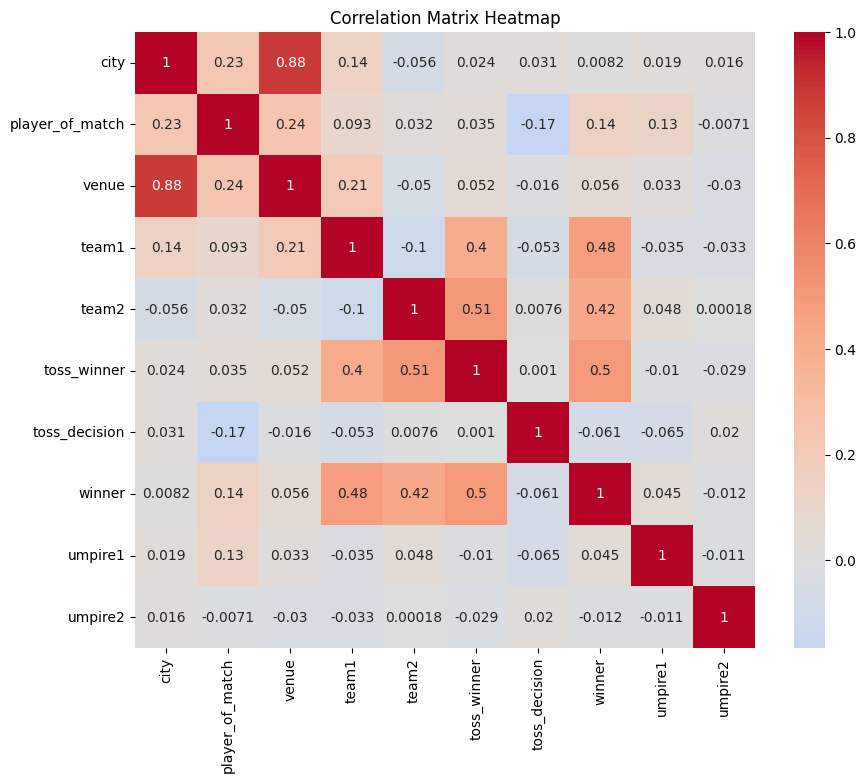

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Splitting our data**

In [ ]:
# Split the data into features (X) and the target variable (y)
X = data.drop(['winner'], axis=1)
y = data['winner']

In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Training our Model**

### **1. Logistic Regression**

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3067484662576687


### **2. SVM**

In [ ]:
# Initialize the logistic regression model
model = SVC()

# Train the model on the training data
model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.147239263803681


### **3. Random Forest**

In [ ]:
# Initialize the logistic regression model
model = RandomForestClassifier(n_estimators=13)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=13)

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.558282208588957


### **4. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=4)  # Replace 3 with your chosen value of K

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([4, 2, 4, 7, 1, 3, 4, 3, 2, 3, 2, 4, 2, 1, 5, 1, 2, 7, 7, 3, 1, 2,
       4, 8, 1, 1, 8, 8, 2, 2, 1, 4, 8, 1, 1, 1, 4, 8, 3, 2, 2, 5, 8, 1,
       2, 8, 6, 6, 4, 4, 1, 1, 3, 7, 1, 1, 6, 2, 8, 7, 1, 1, 2, 2, 1, 6,
       1, 2, 4, 1, 5, 5, 9, 1, 5, 2, 3, 1, 2, 2, 3, 8, 2, 8, 2, 2, 6, 4,
       8, 1, 6, 1, 1, 1, 5, 1, 1, 2, 1, 4, 1, 2, 1, 1, 3, 2, 1, 3, 7, 6,
       2, 2, 8, 5, 5, 5, 2, 2, 7, 2, 1, 2, 1, 7, 5, 7, 5, 1, 3, 2, 8, 1,
       6, 2, 3, 7, 8, 2, 1, 3, 8, 7, 7, 8, 1, 1, 2, 7, 2, 1, 2, 4, 2, 1,
       1, 2, 8, 5, 3, 1, 1, 4, 2])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy:.2f}")

Accuracy of KNN: 0.22


### **5. Simple Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Build a simple neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
17/17 [==============================] - 1s 15ms/step - loss: -134.6245 - accuracy: 0.1252 - val_loss: -261.7520 - val_accuracy: 0.1462
Epoch 2/10
17/17 [==============================] - 0s 6ms/step - loss: -462.7299 - accuracy: 0.1252 - val_loss: -660.0676 - val_accuracy: 0.1462
Epoch 3/10
17/17 [==============================] - 0s 5ms/step - loss: -1061.4077 - accuracy: 0.1252 - val_loss: -1452.5695 - val_accuracy: 0.1462
Epoch 4/10
17/17 [==============================] - 0s 5ms/step - loss: -2262.5796 - accuracy: 0.1252 - val_loss: -2939.2793 - val_accuracy: 0.1462
Epoch 5/10
17/17 [==============================] - 0s 5ms/step - loss: -4407.6733 - accuracy: 0.1252 - val_loss: -5576.3066 - val_accuracy: 0.1462
Epoch 6/10
17/17 [==============================] - 0s 4ms/step - loss: -8107.1011 - accuracy: 0.1252 - val_loss: -9925.7012 - val_accuracy: 0.1462
Epoch 7/10
17/17 [==============================] - 0s 4ms/step - loss: -14040.7471 - accuracy: 0.1252 - val_loss: 

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

6/6 [==============================] - 0s 2ms/step - loss: -68616.6641 - accuracy: 0.0920
Test Accuracy: 0.09


### **6. LGBMClassifier**

In [ ]:
# Create an instance of the LGBMClassifier model
model = lgb.LGBMClassifier(
    boosting_type='gbdt',       # The type of boosting algorithm to use ('gbdt': Gradient Boosting Decision Tree)
    num_leaves=31,              # Number of leaves in one tree (default: 31)
    max_depth=-1,               # Maximum tree depth for base learners (-1 means no limit, default: -1)
    learning_rate=0.1,          # Learning rate or shrinkage rate to prevent overfitting (default: 0.1)
    n_estimators=100            # Number of boosting iterations (default: 100)
)

# Fit the model on the training data
model.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 9
[LightGBM] [Info] Start training from score -2.044616
[LightGBM] [Info] Start training from score -2.093406
[LightGBM] [Info] Start training from score -2.270740
[LightGBM] [Info] Start training from score -2.093406
[LightGBM] [Info] Start training from score -2.285778
[LightGBM] [Info] Start training from score -2.226937
[LightGBM] [Info] Start training from score -2.068713
[LightGBM] [Info] Start training from score -2.068713
[LightGBM] [Info] Start training from score -3.339939
[LightGBM] [Info] Start training from score -4.865995
[LightGBM] [Info] Start training from score -4.172848
[LightGBM] [Warning] No further splits with positive g

LGBMClassifier()

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6809815950920245


# **Comparing Accuracy of different model**

In [ ]:
algorithm_names = ['Logistic Regression', 'SVM', 'Random Forest', 'KNN', 'Simple Neural', 'LGBMClassifier']
accuracy_values = [0.30, 0.14, 0.55, 0.22, 0.09, 0.68]

Text(0, 0.5, 'Accuracy')

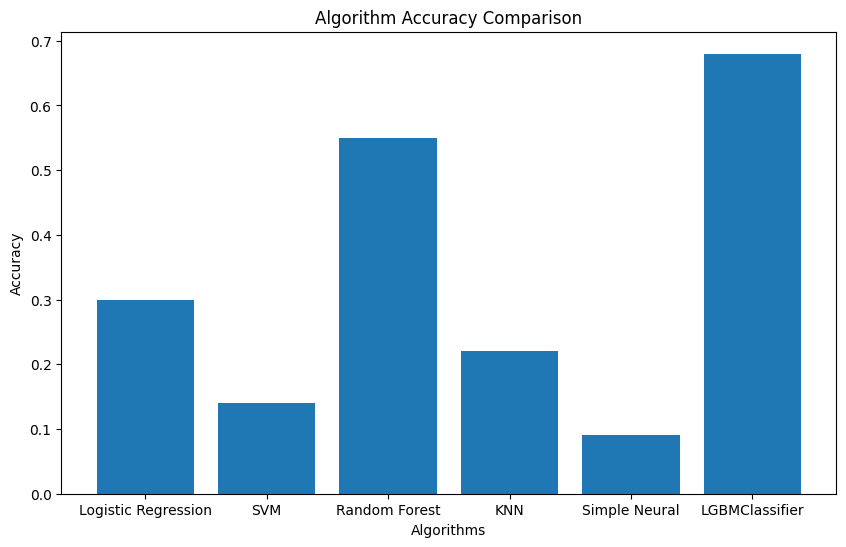

In [ ]:
# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, accuracy_values)
plt.title('Algorithm Accuracy Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
#plt.grid(axis='y')

# **Buidling a predictive system**

In [ ]:
# Function to get user input for prediction
def get_user_input():
    City = input("Enter the city: ")
    Player_of_match = input("Enter the player of the match: ")
    Venue = input("Enter the venue: ")
    Team1 = input("Enter the first team: ")
    Team2 = input("Enter the second team: ")
    Toss_winner = input("Enter the toss winner: ")
    Toss_decision = input("Enter the toss decision (bat or field): ")
    Umpire1 = input("Enter the name of the first umpire: ")
    Umpire2 = input("Enter the name of the second umpire: ")

    # Display the user input and win probability for Team 1
    print("\n\nUser Input:")
    print(f"City: {City}")
    print(f"Player of the Match: {Player_of_match}")
    print(f"Venue: {Venue}")
    print(f"Team 1: {Team1}")
    print(f"Team 2: {Team2}")
    print(f"Toss Winner: {Toss_winner}")
    print(f"Toss Decision: {Toss_decision}")
    print(f"Umpire1: {Umpire1}")
    print(f"Umpire2: {Umpire2}")
    print("\n")

    # Map user input to numerical forms based on the mappings
    city_numeric = city_mapping.get(City, -1)
    player_of_match_numeric = player_of_match_mapping.get(Player_of_match, -1)
    venue_numeric = venue_mapping.get(Venue, -1)
    team1_numeric = team_mapping.get(Team1,-1)
    team2_numeric = team_mapping.get(Team2,-1)
    toss_winner_numeric = team_mapping.get(Toss_winner,-1)
    toss_decision_numeric = temp.get(Toss_decision,-1)
    umpire1_numeric = umpire_dict.get(Umpire1,-1)
    umpire2_numeric = umpire_dict.get(Umpire2,-1)

    user_data = pd.DataFrame({
        'city': [city_numeric],
        'player_of_match': [player_of_match_numeric],
        'venue': [venue_numeric],
        'team1': [team1_numeric],
        'team2': [team2_numeric],
        'toss_winner': [toss_winner_numeric],
        'toss_decision': [toss_decision_numeric],
        'umpire1': [umpire1_numeric],
        'umpire2': [umpire2_numeric]
    })

    return user_data

In [ ]:
# Function to make predictions on user input
def make_predictions(user_data):
    # Make predictions on the user input data
    predictions = model.predict(user_data)

    # Get the probability of winning for the 1st team (team1)
    win_probability_team1 = predictions[0]

    # Convert probability to percentage
    win_probability_percentage_team1 = win_probability_team1 * 10

    return win_probability_percentage_team1

In [ ]:
# Main function to run the predictive system
def main():
    print("Welcome to the IPL Match Winner Predictor!")

    #while True:
    user_data = get_user_input()

    # Display the win probability for the 1st team (team1)
    win_probability_team1 = make_predictions(user_data)
    print(f"Win Probability for Team 1: {win_probability_team1:.2f}%")

    # Display the win probability for the 2nd team (team2)
    win_probability_team2 = 100-win_probability_team1
    print(f"Win Probability for Team 2: {win_probability_team2:.2f}%")

    print("\n\nThank you for using the IPL Match Winner Predictor!")

if __name__ == "__main__":
    main()

Welcome to the IPL Match Winner Predictor!
Enter the city: Mumbai
Enter the player of the match: AB de Villiers
Enter the venue: Wankhede Stadium	
Enter the first team: Royal Challengers Bangalore
Enter the second team: Mumbai Indians
Enter the toss winner: Mumbai Indians
Enter the toss decision (bat or field): bat
Enter the name of the first umpire: Nitin Menon
Enter the name of the second umpire: S Ravi


User Input:
City: Mumbai
Player of the Match: AB de Villiers
Venue: Wankhede Stadium	
Team 1: Royal Challengers Bangalore
Team 2: Mumbai Indians
Toss Winner: Mumbai Indians
Toss Decision: bat
Umpire1: Nitin Menon
Umpire2: S Ravi


Win Probability for Team 1: 40.00%
Win Probability for Team 2: 60.00%


Thank you for using the IPL Match Winner Predictor!
